## Gas Sensor Array Drift - Modelagem

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [2]:
seed = 10

### Leitura dos Dados

In [3]:
dataset = pd.read_csv('../Dataset/dataset_pca.csv')

In [4]:
print(dataset.shape)
dataset.head()

(13910, 25)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,target
0,-2.339565,0.198422,-0.173254,0.216613,0.267055,-0.025103,0.052416,0.050608,0.013126,0.033547,...,-0.007222,-0.006154,0.009660,0.003787,0.020207,0.034466,-0.010471,-0.012667,0.009506,1.0
1,-2.108847,0.266302,-0.109280,0.187270,0.257059,-0.014747,0.098163,0.050763,0.001345,0.027209,...,-0.017720,-0.001472,0.011223,-0.006269,0.032545,0.036374,-0.021074,-0.013904,0.004126,1.0
2,-1.806437,0.367635,-0.018661,0.181458,0.279032,0.000210,0.154078,0.055977,-0.009243,0.007621,...,-0.006342,-0.015004,0.009204,-0.000443,0.034913,0.031931,-0.020171,-0.016194,0.010860,1.0
3,-1.654477,0.411155,-0.005173,0.081328,0.289931,0.096692,0.115238,0.016243,-0.017247,0.052043,...,-0.022185,0.038554,-0.010184,0.050581,0.020085,0.021108,0.025204,-0.037345,0.014856,1.0
4,-1.404309,0.475124,0.112300,0.192767,0.322900,0.032027,0.222424,0.070189,-0.015679,-0.016262,...,0.003993,-0.030851,0.005612,0.011120,0.035992,0.034510,-0.011359,-0.021883,0.011947,1.0


## Separação dos dados

In [5]:
X = dataset.drop('target', axis=1)
y = dataset.loc[:,'target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

## Classificação

In [7]:
kfold = StratifiedKFold(n_splits=10, random_state=seed)

### k-NN

#### Seleção dos parâmetros *n_neighbors* e *metric*

In [8]:
results = []
for k in range(1, 11):
    for metric in ['euclidean', 'manhattan', 'chebyshev']:
        params = {'n_neighbors': k, 'metric': metric}
        
        clf_knn = KNeighborsClassifier(**params)
        
        scores = cross_val_score(clf_knn, X_train, y_train, cv=kfold)
        scores_mean = scores.mean()
        scores_std = scores.std()
        
        results.append((params, scores_mean, scores_std))
        
        print('Acuracia - KNN: k = %2d, metric = %s, scores: %0.3f' % (k, metric, scores_mean))

Acuracia - KNN: k =  1, metric = euclidean, scores: 0.995
Acuracia - KNN: k =  1, metric = manhattan, scores: 0.996
Acuracia - KNN: k =  1, metric = chebyshev, scores: 0.993
Acuracia - KNN: k =  2, metric = euclidean, scores: 0.994
Acuracia - KNN: k =  2, metric = manhattan, scores: 0.995
Acuracia - KNN: k =  2, metric = chebyshev, scores: 0.992
Acuracia - KNN: k =  3, metric = euclidean, scores: 0.993
Acuracia - KNN: k =  3, metric = manhattan, scores: 0.995
Acuracia - KNN: k =  3, metric = chebyshev, scores: 0.991
Acuracia - KNN: k =  4, metric = euclidean, scores: 0.992
Acuracia - KNN: k =  4, metric = manhattan, scores: 0.994
Acuracia - KNN: k =  4, metric = chebyshev, scores: 0.989
Acuracia - KNN: k =  5, metric = euclidean, scores: 0.991
Acuracia - KNN: k =  5, metric = manhattan, scores: 0.993
Acuracia - KNN: k =  5, metric = chebyshev, scores: 0.987
Acuracia - KNN: k =  6, metric = euclidean, scores: 0.990
Acuracia - KNN: k =  6, metric = manhattan, scores: 0.993
Acuracia - KNN

In [9]:
results = np.array(results)
idx_best_result = results[:, 1].argmax()
results[idx_best_result]

array([{'n_neighbors': 1, 'metric': 'manhattan'}, 0.9958774482577667,
       0.002190101118254926], dtype=object)

In [10]:
df_results = pd.DataFrame(results)
df_params = df_results[0].apply(lambda x: pd.Series(x))
df_results = pd.concat([df_results.drop(0, axis=1), df_params], axis=1)
df_results.columns = ['score_mean', 'score_std', 'k', 'metric']
df_results.head()

,score_mean,score_std,k,metric
0,0.995207,0.00222842,1,euclidean
1,0.995877,0.0021901,1,manhattan
2,0.993481,0.00249472,1,chebyshev
3,0.994152,0.00255525,2,euclidean
4,0.995015,0.00230271,2,manhattan


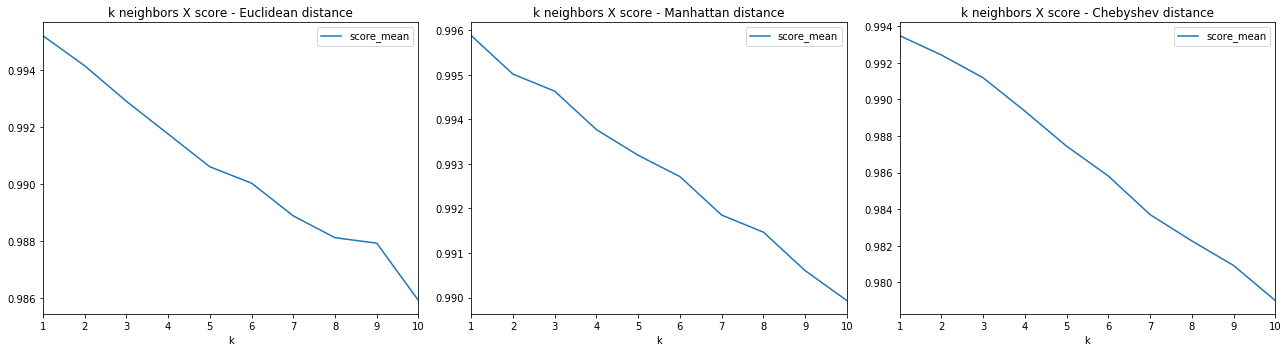

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

df_results[df_results['metric'] == 'euclidean'].plot(x='k', y='score_mean', ax=axs[0], title='k neighbors X score - Euclidean distance')
df_results[df_results['metric'] == 'manhattan'].plot(x='k', y='score_mean', ax=axs[1], title='k neighbors X score - Manhattan distance')
df_results[df_results['metric'] == 'chebyshev'].plot(x='k', y='score_mean', ax=axs[2], title='k neighbors X score - Chebyshev distance')

plt.tight_layout()
plt.show()

Para as três métricas de distância (Euclideana, Manhattan e Chebyshev) utilizados nos experimentos para ajuste dos hiperparâmetros, o modelo apresentou uma queda no desempenho a medida que o valor *k* (número de vizinhos) aumentava. O melhor valor encontrado nos experimentos foi k=1 e a distância de Manhattan. É provável que o valor 1 tenha sido o melhor devido a natureza do problema e dos dados, onde existem medições muito parecidas, então a maior similaridade entre os atributos deve ser do mesmo gás. 

#### Seleção do parâmetro *weights*

In [12]:
results_2 = []
for k in range(1, 4):
    for weight in ['uniform', 'distance']:
        params = {'n_neighbors': k, 'weights': weight}
        
        clf_knn = KNeighborsClassifier(**params, metric='manhattan')
        
        scores = cross_val_score(clf_knn, X_train, y_train, cv=kfold)
        scores_mean = scores.mean()
        scores_std = scores.std()
        
        results_2.append((params, scores_mean, scores_std))
        
        print('Acuracia - KNN: k = %2d, metric = %s, scores: %0.3f' % (k, weight, scores_mean))

Acuracia - KNN: k =  1, metric = uniform, scores: 0.996
Acuracia - KNN: k =  1, metric = distance, scores: 0.996
Acuracia - KNN: k =  2, metric = uniform, scores: 0.995
Acuracia - KNN: k =  2, metric = distance, scores: 0.996
Acuracia - KNN: k =  3, metric = uniform, scores: 0.995
Acuracia - KNN: k =  3, metric = distance, scores: 0.996


In [13]:
results_2 = np.array(results_2)
idx_best_result = results_2[:, 1].argmax()
results_2[idx_best_result]

array([{'n_neighbors': 1, 'weights': 'uniform'}, 0.9958774482577667,
       0.002190101118254926], dtype=object)

In [14]:
df_results = pd.DataFrame(results_2)
df_params = df_results[0].apply(lambda x: pd.Series(x))
df_results = pd.concat([df_results.drop(0, axis=1), df_params], axis=1)
df_results.columns = ['score_mean', 'score_std', 'k', 'weight']
df_results.sort_values('score_mean', ascending=False).head()

,score_mean,score_std,k,weight
0,0.995877,0.0021901,1,uniform
1,0.995877,0.0021901,1,distance
3,0.995877,0.0021901,2,distance
5,0.99559,0.00227517,3,distance
2,0.995015,0.00230271,2,uniform


Após encontrar que os valores de *k* mais baixos obtiveram os melhores resultados, foram realizados experimentos para encontrar o melhor valor para o parâmetro *weights*. As duas opções investigadas para este parâmetro é o peso uniforme para as instâncias, e a outra opção, é o cálculo ponderado, com maior peso para instâncias mais próximas. O melhor resultado ainda foi para k=1, mas agora apareceu com o mesmo score k=2 com peso ponderado. Ainda assim, o valor de k continua sendo muito pequeno e não terá grande impacto utilizar o peso ponderado neste caso.

### Decistion Tree

#### Seleção do parâmetro *criterion*, *max_depth* e *min_samples_split*

In [15]:
criterion_list = ['gini', 'entropy']
max_depth_list = [None, 3, 5, 9, 15, 25]
min_samples_split_list = [2, 3, 5, 7, 10]

In [16]:
results = []
for criterion in criterion_list:
    for max_depth in max_depth_list:
        for min_samples_split in min_samples_split_list: 
            params = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_split': min_samples_split}
        
            clf_df = DecisionTreeClassifier(**params)

            scores = cross_val_score(clf_df, X_train, y_train, cv=kfold)
            scores_mean = scores.mean()
            scores_std = scores.std()

            results.append((params, scores_mean, scores_std))

            print('Acuracia - DF: criterion = %s max_depth = %s, min_samples_split = %s scores: %0.3f' % (criterion, str(max_depth), min_samples_split, scores_mean))

Acuracia - DF: criterion = gini max_depth = None, min_samples_split = 2 scores: 0.978
Acuracia - DF: criterion = gini max_depth = None, min_samples_split = 3 scores: 0.976
Acuracia - DF: criterion = gini max_depth = None, min_samples_split = 5 scores: 0.976
Acuracia - DF: criterion = gini max_depth = None, min_samples_split = 7 scores: 0.974
Acuracia - DF: criterion = gini max_depth = None, min_samples_split = 10 scores: 0.974
Acuracia - DF: criterion = gini max_depth = 3, min_samples_split = 2 scores: 0.579
Acuracia - DF: criterion = gini max_depth = 3, min_samples_split = 3 scores: 0.579
Acuracia - DF: criterion = gini max_depth = 3, min_samples_split = 5 scores: 0.579
Acuracia - DF: criterion = gini max_depth = 3, min_samples_split = 7 scores: 0.579
Acuracia - DF: criterion = gini max_depth = 3, min_samples_split = 10 scores: 0.579
Acuracia - DF: criterion = gini max_depth = 5, min_samples_split = 2 scores: 0.786
Acuracia - DF: criterion = gini max_depth = 5, min_samples_split = 3 s

In [17]:
results = np.array(results)
idx_best_result = results[:, 1].argmax()
results[idx_best_result]

array([{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2},
       0.97785421822598, 0.005040135356338393], dtype=object)

In [18]:
df_results = pd.DataFrame(results)
df_params = df_results[0].apply(lambda x: pd.Series(x))
df_results = pd.concat([df_results.drop(0, axis=1), df_params], axis=1)
df_results.columns = ['score_mean', 'score_std', 'criterion', 'max_depth', 'min_samples_split']
df_results.head()

,score_mean,score_std,criterion,max_depth,min_samples_split
0,0.977854,0.00504014,gini,NaN,2
1,0.976417,0.00561925,gini,NaN,3
2,0.975935,0.00553721,gini,NaN,5
3,0.973826,0.00574654,gini,NaN,7
4,0.974019,0.00433932,gini,NaN,10


In [19]:
df_results.sort_values('score_mean', ascending=False).head(10)

,score_mean,score_std,criterion,max_depth,min_samples_split
0,0.977854,0.00504014,gini,NaN,2
31,0.97776,0.00508501,entropy,NaN,3
25,0.97747,0.00479596,gini,25.0,2
20,0.976605,0.00580985,gini,15.0,2
50,0.976515,0.00498296,entropy,15.0,2
1,0.976417,0.00561925,gini,NaN,3
55,0.975941,0.00595255,entropy,25.0,2
53,0.975941,0.00533585,entropy,15.0,7
2,0.975935,0.00553721,gini,NaN,5
30,0.975749,0.00468909,entropy,NaN,2


Os 10 melhores resultados mostram que a profundidade da árvore deve ser razoavelmente grande, principalmente comparada aos intervalos investigados. Alé de valores altos como 15 e 25, o valor nulo (NaN) significa que a árvore não terá tamanho previamente estabelecido, a árvore crescerá e depois será realizada a poda. Este valor no parâmetro *max_depht* está presente em boa parte dos melhores resultados, incluindo o melhor.

O parâmetro que indica qual será a medida de qualidade dos atributos utilizada pela árvore, teve melhor desempenho com a Impureza Gini, ocupando as três primeiras posições. Enquanto a entropia (parâmetro que indica critérido de qualidade de Ganho de Informação), apareceu em 60% dos 10 melhores resultados.

O número mínimo de exemplos para dividir um nó foi baixo (*min_samples_split*). Apenas uma ocorrência de um valor relativamente alto, e este ocupava a 10ª posição.

### Random Forest

#### Seleção do parâmetro *n_estimators*

In [20]:
results = []
for n_estimators in range(10,401,20):
    clf_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=10, n_jobs=-1)
    
    scores = cross_val_score(clf_rf, X_train, y_train, cv=kfold)
    scores_mean = scores.mean()
    scores_std = scores.std()
    
    results.append(({'n_estimators': n_estimators}, scores_mean, scores_std))

    print('Acuracia - RF: n_estimators = %2d, scores: %0.3f' % (n_estimators, scores_mean))

Acuracia - RF: n_estimators = 10, scores: 0.993
Acuracia - RF: n_estimators = 30, scores: 0.994
Acuracia - RF: n_estimators = 50, scores: 0.994
Acuracia - RF: n_estimators = 70, scores: 0.994
Acuracia - RF: n_estimators = 90, scores: 0.994
Acuracia - RF: n_estimators = 110, scores: 0.994
Acuracia - RF: n_estimators = 130, scores: 0.994
Acuracia - RF: n_estimators = 150, scores: 0.994
Acuracia - RF: n_estimators = 170, scores: 0.994
Acuracia - RF: n_estimators = 190, scores: 0.994
Acuracia - RF: n_estimators = 210, scores: 0.994
Acuracia - RF: n_estimators = 230, scores: 0.994
Acuracia - RF: n_estimators = 250, scores: 0.994
Acuracia - RF: n_estimators = 270, scores: 0.994
Acuracia - RF: n_estimators = 290, scores: 0.994
Acuracia - RF: n_estimators = 310, scores: 0.994
Acuracia - RF: n_estimators = 330, scores: 0.994
Acuracia - RF: n_estimators = 350, scores: 0.994
Acuracia - RF: n_estimators = 370, scores: 0.994
Acuracia - RF: n_estimators = 390, scores: 0.994


In [21]:
results = np.array(results)
idx_best_result = results[:, 1].argmax()
results[idx_best_result]

array([{'n_estimators': 110}, 0.9944402058863577, 0.002599884725692586],
      dtype=object)

In [22]:
df_results = pd.DataFrame(results)
df_params = df_results[0].apply(lambda x: pd.Series(x))
df_results = pd.concat([df_results.drop(0, axis=1), df_params], axis=1)
df_results.columns = ['score_mean', 'score_std', 'n_estimators']
df_results.head()

,score_mean,score_std,n_estimators
0,0.992524,0.0028659,10
1,0.993674,0.00318326,30
2,0.993962,0.00296832,50
3,0.993961,0.00281137,70
4,0.993961,0.00267924,90


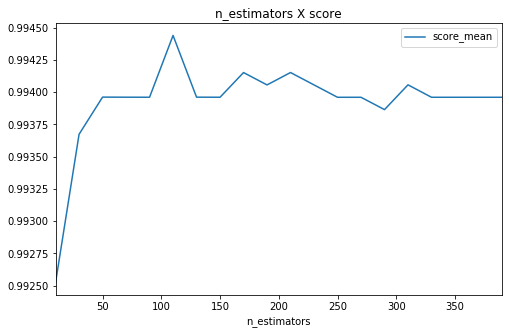

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))

df_results.plot(x='n_estimators', y='score_mean', ax=ax, title='n_estimators X score')
plt.show()

O número de estimadores (*n_estimators*) é o principal parâmetro do classificador Random Forest. Ele define o número de árvores que serão utilizadas. O resultado encontrado apresenta uma establidade quando o valor ultrapassa 50 estimadores (ou árvores), mas apresenta uma elevação quando são utilizadas 110 árvores, sendo este o melhor valor encontrado.

In [ ]:
activ = ['identity', 'logistic', 'tanh', 'relu']
solv = ['lbfgs', 'sgd', 'adam']

for sol in solv:
    
    for act in activ:

        for i in range(20,100,10):
        
            mlp1 = MLPClassifier(hidden_layer_sizes=([i]),solver=sol,activation=act,
                                 max_iter=5000,random_state=10)
            mlp2 = MLPClassifier(hidden_layer_sizes=(i-5,i-10),solver=sol,activation=act,
                                 max_iter=5000,random_state=10)
            mlp3 = MLPClassifier(hidden_layer_sizes=([i-5,i-5,i-10]),solver=sol,activation=act,
                                 max_iter=5000,random_state=10)
            
            mlp1=mlp1.fit(X_train, y_train)
            mlp2=mlp2.fit(X_train, y_train)
            mlp3=mlp3.fit(X_train, y_train)
            
            print("Uma camada escondida", i, sol, act, "Acuracia de trainamento MLP1: %0.3f" %  mlp1.score(X_train, y_train))
            print("Uma camada escondida", i, sol, act, "Acuracia de validação MLP1: %0.3f" %  mlp1.score(X_test, y_test))
            
            print("Duas camadas escondidas", i-5, i-10, sol, act, "Acuracia de trainamento MLP2: %0.3f" %  mlp2.score(X_train, y_train))
            print("Duas camadas escondidas", i-5, i-10, sol, act, "Acuracia de validação MLP2: %0.3f" %  mlp2.score(X_test, y_test))
            
            print("Três camadas escondidas", i-5, i-5, i-10, sol, act, "Acuracia de trainamento MLP3: %0.3f" %  mlp3.score(X_train, y_train))
            print("Três camadas escondidas", i-5, i-5, i-10, sol, act, "Acuracia de validação MLP3: %0.3f" %  mlp3.score(X_test, y_test))

Uma camada escondida 20 lbfgs identity Acuracia de trainamento MLP1: 0.988
Uma camada escondida 20 lbfgs identity Acuracia de validação MLP1: 0.984
Duas camadas escondidas 15 10 lbfgs identity Acuracia de trainamento MLP2: 0.988
Duas camadas escondidas 15 10 lbfgs identity Acuracia de validação MLP2: 0.984
Três camadas escondidas 15 15 10 lbfgs identity Acuracia de trainamento MLP3: 0.988
Três camadas escondidas 15 15 10 lbfgs identity Acuracia de validação MLP3: 0.984
Uma camada escondida 30 lbfgs identity Acuracia de trainamento MLP1: 0.988
Uma camada escondida 30 lbfgs identity Acuracia de validação MLP1: 0.985
Duas camadas escondidas 25 20 lbfgs identity Acuracia de trainamento MLP2: 0.988
Duas camadas escondidas 25 20 lbfgs identity Acuracia de validação MLP2: 0.984
Três camadas escondidas 25 25 20 lbfgs identity Acuracia de trainamento MLP3: 0.988
Três camadas escondidas 25 25 20 lbfgs identity Acuracia de validação MLP3: 0.984
Uma camada escondida 40 lbfgs identity Acuracia de t

Uma camada escondida 40 lbfgs tanh Acuracia de trainamento MLP1: 1.000
Uma camada escondida 40 lbfgs tanh Acuracia de validação MLP1: 0.993
Duas camadas escondidas 35 30 lbfgs tanh Acuracia de trainamento MLP2: 1.000
Duas camadas escondidas 35 30 lbfgs tanh Acuracia de validação MLP2: 0.992
Três camadas escondidas 35 35 30 lbfgs tanh Acuracia de trainamento MLP3: 1.000
Três camadas escondidas 35 35 30 lbfgs tanh Acuracia de validação MLP3: 0.991
Uma camada escondida 50 lbfgs tanh Acuracia de trainamento MLP1: 1.000
Uma camada escondida 50 lbfgs tanh Acuracia de validação MLP1: 0.992
Duas camadas escondidas 45 40 lbfgs tanh Acuracia de trainamento MLP2: 1.000
Duas camadas escondidas 45 40 lbfgs tanh Acuracia de validação MLP2: 0.993
Três camadas escondidas 45 45 40 lbfgs tanh Acuracia de trainamento MLP3: 1.000
Três camadas escondidas 45 45 40 lbfgs tanh Acuracia de validação MLP3: 0.994
Uma camada escondida 60 lbfgs tanh Acuracia de trainamento MLP1: 1.000
Uma camada escondida 60 lbfgs

Uma camada escondida 70 sgd identity Acuracia de trainamento MLP1: 0.977
Uma camada escondida 70 sgd identity Acuracia de validação MLP1: 0.978
Duas camadas escondidas 65 60 sgd identity Acuracia de trainamento MLP2: 0.984
Duas camadas escondidas 65 60 sgd identity Acuracia de validação MLP2: 0.981
Três camadas escondidas 65 65 60 sgd identity Acuracia de trainamento MLP3: 0.985
Três camadas escondidas 65 65 60 sgd identity Acuracia de validação MLP3: 0.982
Uma camada escondida 80 sgd identity Acuracia de trainamento MLP1: 0.978
Uma camada escondida 80 sgd identity Acuracia de validação MLP1: 0.978
Duas camadas escondidas 75 70 sgd identity Acuracia de trainamento MLP2: 0.983
Duas camadas escondidas 75 70 sgd identity Acuracia de validação MLP2: 0.981
Três camadas escondidas 75 75 70 sgd identity Acuracia de trainamento MLP3: 0.985
Três camadas escondidas 75 75 70 sgd identity Acuracia de validação MLP3: 0.983
Uma camada escondida 90 sgd identity Acuracia de trainamento MLP1: 0.979
Uma

In [ ]:
mlp1 = MLPClassifier(hidden_layer_sizes=([85,85,80]),solver='lbfgs',activation='tanh',
                     max_iter=5000,random_state=10)
results_mlp1 = cross_val_score(mlp1, X_train, y_train, cv=kfold)
print(results_mlp1, results_mlp1.mean(), results_mlp1.std())

mlp1 = mlp1.fit(X_train, y_train)

y_test_pred_mlp1 = mlp1.predict(X_test)

print("Clasification report mlp1:", classification_report(y_test, y_test_pred_mlp1))
print("Confussion matrix mlp1:", confusion_matrix(y_test, y_test_pred_mlp1))

print("Acuracia treino mlp1: %0.3f" %  mlp1.score(X_train, y_train))
print("Acuracia validação mlp1: %0.3f" %  mlp1.score(X_test, y_test))


In [ ]:
mlp1 = MLPClassifier(hidden_layer_sizes=([30]),solver='lbfgs',activation='logistic',
                     max_iter=5000,random_state=10)
mlp2 = MLPClassifier(hidden_layer_sizes=(35,30),solver='lbfgs',activation='relu',
                     max_iter=5000,random_state=10)
mlp3 = MLPClassifier(hidden_layer_sizes=([85,85,80]),solver='lbfgs',activation='tanh',
                     max_iter=5000,random_state=10)

mlp_array = [mlp1,mlp2,mlp3]
for mlp in mlp_array:
    pima_scores = cross_val_score(mlp, X_train, y_train, cv=10)
    bagging_mlp = BaggingClassifier(mlp, max_samples=0.5, random_state=10)
    bagging_mlp_scores = cross_val_score(bagging_mlp, X_train, y_train, cv=10)
    print('Media mlp', mlp, pima_scores.mean(), 'Desvio mlp', pima_scores.std(),
          'Media Bagging', bagging_mlp_scores.mean(), 'Desvio Bagging', bagging_mlp_scores.std())


In [ ]:
mlp1 = MLPClassifier(hidden_layer_sizes=([30]),solver='lbfgs',activation='logistic',
                     max_iter=5000,random_state=10)
mlp2 = MLPClassifier(hidden_layer_sizes=(35,30),solver='lbfgs',activation='relu',
                     max_iter=5000,random_state=10)
mlp3 = MLPClassifier(hidden_layer_sizes=([85,85,80]),solver='lbfgs',activation='tanh',
                     max_iter=5000,random_state=10)

# create the sub models
estimators_mlp = []
estimators_mlp.append(('RNA1', mlp1))
estimators_mlp.append(('RNA2', mlp2))
estimators_mlp.append(('RNA3', mlp3))

# create the ensemble model ## 'hard' = voto majoritario, 'soft' = pesos, probabilidades
ensemble_mlp = VotingClassifier(estimators_mlp, voting='hard')
results_mlp = cross_val_score(ensemble_mlp, X_train, y_train, cv=kfold)
print(results_mlp, results_mlp.mean(), results_mlp.std())

ensemble_mlp = ensemble_mlp.fit(X_train, y_train)

y_test_pred_ensemble_mlp = ensemble_mlp.predict(X_test)

print("Clasification report ensemble_mlp:", classification_report(y_test, y_test_pred_ensemble_mlp))
print("Confussion matrix ensemble_mlp:", confusion_matrix(y_test, y_test_pred_ensemble_mlp))

print("Acuracia treino ensemble_mlp: %0.3f" %  ensemble_mlp.score(X_train, y_train))
print("Acuracia validação ensemble_mlp: %0.3f" %  ensemble_mlp.score(X_test, y_test))


In [ ]:
kern = ('linear', 'poly', 'rbf', 'sigmoid')

for ker in kern:

    svm = SVC(kernel=ker, random_state = 10)

    svm = svm.fit(X_train, y_train)

    print("SVM", ker, "Acuracia de trainamento: %0.3f" %  svm.score(X_train, y_train))
    print("SVM", ker, "Acuracia de validação: %0.3f" %  svm.score(X_test, y_test))


In [ ]:
solv = ('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga')

for sol in solv:

    rg = RidgeClassifier(solver=sol, random_state = 10)

    rg = rg.fit(X_train, y_train)

    print("RG", sol, "Acuracia de trainamento: %0.3f" %  rg.score(X_train, y_train))
    print("RG", sol, "Acuracia de validação: %0.3f" %  rg.score(X_test, y_test))


In [ ]:
solv = ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
mult = ('ovr', 'multinomial', 'auto')

for sol in solv:

    for c in range(1,100010,20000):
    
        lr = LogisticRegression(C=c, solver=sol, max_iter=100000, multi_class='auto', random_state=10)
    
        lr = lr.fit(X_train, y_train)
    
        print("LR", sol, c, "Acuracia de trainamento: %0.3f" %  lr.score(X_train, y_train))
        print("LR", sol, c, "Acuracia de validação: %0.3f" %  lr.score(X_test, y_test))


In [ ]:
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11 , random_state=10)
svm = SVC(kernel='linear', random_state = 10)
rg = RidgeClassifier(solver='auto', random_state = 10)
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
rf = RandomForestClassifier(n_estimators=100, random_state=10)
lr = LogisticRegression(C=1e5, solver='newton-cg', multi_class='auto',
                        max_iter=100000, random_state=10)

clf_array = [dt, svm, rg, knn, rf, lr]
for clf in clf_array:
    pima_scores = cross_val_score(clf, X_train, y_train, cv=10)
#    bagging_clf = BaggingClassifier(base_estimator=clf, n_estimators=15, random_state=10)
    bagging_clf = BaggingClassifier(base_estimator=clf, random_state=10)
    bagging_clf_scores = cross_val_score(bagging_clf, X_train, y_train, cv=10)    
    print('Media clf', clf, pima_scores.mean(), 'Desvio clf', pima_scores.std(),
          'Media Bagging clf', bagging_clf_scores.mean(), 'Desvio Bagging clf',
          bagging_clf_scores.std())

# create the sub models
estimators_clf = []
estimators_clf.append(('DT', dt))
estimators_clf.append(('SVM', svm))
estimators_clf.append(('RG', rg))
estimators_clf.append(('KNN', knn))
estimators_clf.append(('RF', rf))
estimators_clf.append(('LR', lr))

# create the ensemble model ## 'hard' = voto majoritario, 'soft' = pesos, probabilidades
ensemble_clf = VotingClassifier(estimators_clf, voting='hard')
results_clf = cross_val_score(ensemble_clf, X_train, y_train, cv=kfold)
print(results_clf, results_clf.mean(), results_clf.std())

ensemble_clf = ensemble_clf.fit(X_train, y_train)

y_test_pred_ensemble_clf = ensemble_clf.predict(X_test)

print("Clasification report ensemble_clf:", classification_report(y_test,
                                                                    y_test_pred_ensemble_clf))
print("Confussion matrix ensemble_clf:", confusion_matrix(y_test, y_test_pred_ensemble_clf))

print("Acuracia treino ensemble_clf: %0.3f" %  ensemble_clf.score(X_train, y_train))
print("Acuracia validação ensemble_clf: %0.3f" %  ensemble_clf.score(X_test, y_test))
